In [2]:
#load data
import pandas as pd
import numpy as np

data = pd.read_csv('exam_pass_prediction.csv')
data.head()

,exam1,exam1_2,pass
0,72.450712,86.792265,1
1,62.926035,81.095604,1
2,74.715328,70.715564,1
3,87.845448,62.236759,1
4,61.487699,78.378680,1


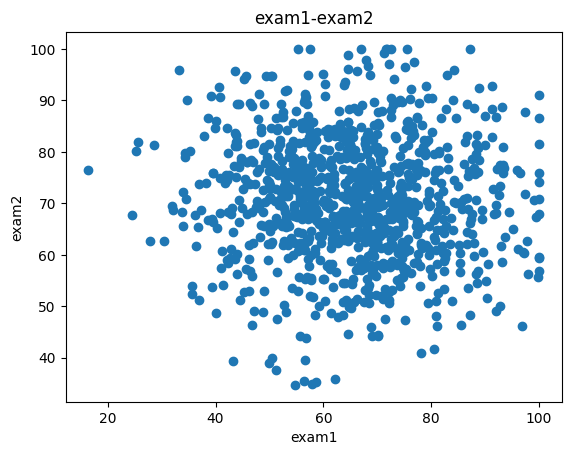

In [3]:
#visualize the data
from matplotlib import pyplot as plt
fig1 = plt.figure()
plt.scatter(data.loc[:,'exam1'], data.loc[:, 'exam1_2'])
plt.title('exam1-exam2')
plt.xlabel('exam1')
plt.ylabel('exam2')
plt.show()

In [4]:
mask = data.loc[:, 'pass'] == 1
print(mask)

0       True
1       True
2       True
3       True
4       True
       ...  
995     True
996     True
997    False
998    False
999     True
Name: pass, Length: 1000, dtype: bool


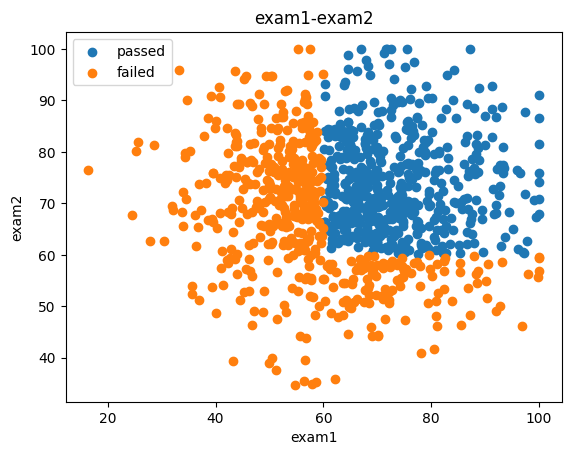

In [5]:
flg2 = plt.figure()
passed = plt.scatter(data.loc[:, 'exam1'][mask], data.loc[:,"exam1_2"][mask])
failed = plt.scatter(data.loc[:, 'exam1'][~mask], data.loc[:,"exam1_2"][~mask])
plt.title('exam1-exam2')
plt.xlabel('exam1')
plt.ylabel('exam2')
plt.legend((passed, failed),('passed', 'failed'))
plt.show()

In [6]:
x = data.drop(['pass'], axis=1)
y = data.loc[:, 'pass']
x1 = data.loc[:, 'exam1']
x2 = data.loc[:, 'exam1_2']
x.head()
y.head()



0    1
1    1
2    1
3    1
4    1
Name: pass, dtype: int64

In [7]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x, y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [8]:
#show the predicted result and 
y_predict = LR.predict(x)
print(y_predict)

[1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0 0
 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0 1 1 1 1
 0 1 0 0 1 0 0 1 1 1 0 0 1 1 0 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0
 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 0
 1 0 0 0 0 0 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 0
 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 1 1 0
 1 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0
 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0
 0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0
 1 0 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 1 1 1 0 0
 0 1 1 0 1 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1
 0 0 0 0 0 0 0 1 1 0 1 0 

In [9]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y, y_predict)
print(accuracy)

0.837


In [10]:
#test
y_test = LR.predict([[70, 65]])
print(y_test)

[1]


/usr/local/lib64/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


边界函数
theta0 + theta1*x1 + theta2*x2 = 0
获取theta 值


In [11]:
theta0 = LR.intercept_
theta1,theta2 = LR.coef_[0][0], LR.coef_[0][1]
print(theta0, theta1, theta2)

[-21.81979974] 0.19224765423626144 0.13321935304613852


theta0 + theta1*x1 + theta2*x2 = 0
x2 = -(theta0 + theta1*x1)/theta2

In [12]:
x2_new = -(theta0 + theta1*x1)/theta2
print(x2_new)

0      59.235540
1      72.980515
2      55.967493
3      37.019535
4      75.056165
         ...    
995    76.072395
996    31.074216
997    56.115677
998    82.351545
999    57.593259
Name: exam1, Length: 1000, dtype: float64


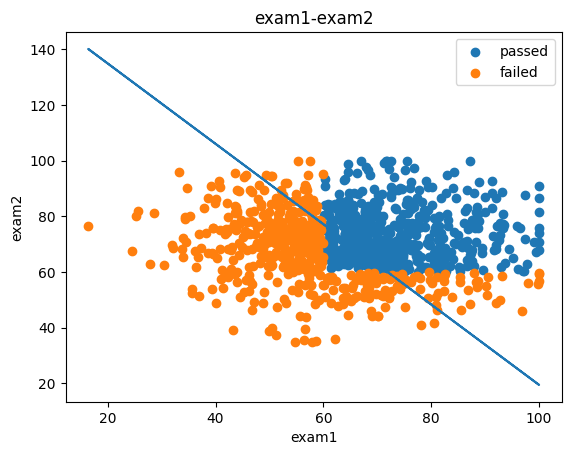

In [13]:
fig3 = plt.figure()
passed = plt.scatter(data.loc[:, 'exam1'][mask], data.loc[:,"exam1_2"][mask])
failed = plt.scatter(data.loc[:, 'exam1'][~mask], data.loc[:,"exam1_2"][~mask])
plt.title('exam1-exam2')
plt.xlabel('exam1')
plt.ylabel('exam2')
plt.legend((passed, failed),('passed', 'failed'))
plt.plot(x1, x2_new)
plt.show()


边界函数：theta0 + theta1*x1 + theta2*x2 = 0
二阶边界函数：theta0 + theta1*x1 + theta2*x2 + theta3*x1^2 + theta4*x2^2 + theta5*x1*x2 = 0


In [14]:
#create new data

x1_2 = x1*x1
x2_2 = x2*x2
x1_x2 = x1*x2

x_new = {'x1':x1, 'x2':x2, 'x1_2': x1_2, 'x2_2':x2*x2, 'x1_x2':x1*x2}
x_new = pd.DataFrame(x_new)
print(x_new)

            x1         x2         x1_2         x2_2        x1_x2
0    72.450712  86.792265  5249.105712  7532.897305  6288.161438
1    62.926035  81.095604  3959.685942  6576.497020  5103.024867
2    74.715328  70.715564  5582.380249  5000.691054  5283.536597
3    87.845448  62.236759  7716.822707  3873.414129  5467.215938
4    61.487699  78.378680  3780.737175  6143.217441  4819.324699
..         ...        ...          ...          ...          ...
995  60.783496  82.841803  3694.633338  6862.764301  5035.414360
996  91.965298  69.681745  8457.616018  4855.545571  6408.302427
997  74.612643  59.417504  5567.046483  3530.439804  4433.297023
998  56.432315  68.043196  3184.606194  4629.876581  3839.835105
999  73.588742  61.061168  5415.302908  3728.466270  4493.414540

[1000 rows x 5 columns]


In [15]:
#establish new model and train
LR2 = LogisticRegression()
LR2.fit(x_new, y)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [16]:
y2_predict = LR2.predict(x_new)
accuracy2 = accuracy_score(y, y2_predict)
print(accuracy2)

0.975


In [17]:
x1_new = x1.sort_values()

In [18]:
#theta0 + theta1*x1 + theta2*x2 + theta3*x1^2 + theta4*x2^2 + theta5*x1*x2 = 0
theta0 = LR2.intercept_
theta1,theta2,theta3,theta4,theta5 = LR2.coef_[0][0],LR2.coef_[0][1],LR2.coef_[0][2],LR2.coef_[0][3],LR2.coef_[0][4]
a = theta4
b = theta5*x1_new + theta2
c = theta0 + theta1*x1_new + theta3*x1_new*x1_new
x2_new_boundary = (-b+np.sqrt(b*b - 4*a*c))/(2*a)
print(x1_new)

262     16.380990
646     24.546700
668     25.235453
74      25.703823
544     27.925332
          ...    
762    100.000000
209    100.000000
113    100.000000
654    100.000000
614    100.000000
Name: exam1, Length: 1000, dtype: float64


/usr/local/lib64/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


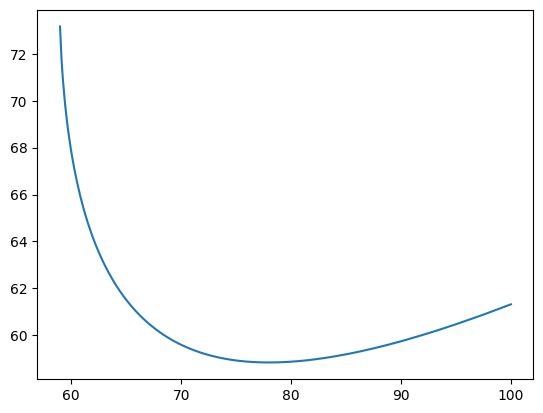

In [19]:
fig4 = plt.figure()
plt.plot(x1_new, x2_new_boundary)
plt.show()

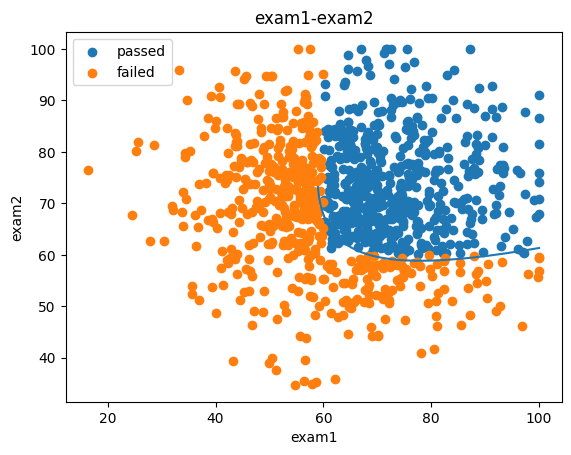

In [20]:
fig5 = plt.figure()
passed = plt.scatter(data.loc[:, 'exam1'][mask], data.loc[:,"exam1_2"][mask])
failed = plt.scatter(data.loc[:, 'exam1'][~mask], data.loc[:,"exam1_2"][~mask])
plt.title('exam1-exam2')
plt.xlabel('exam1')
plt.ylabel('exam2')
plt.legend((passed, failed),('passed', 'failed'))
plt.plot(x1_new, x2_new_boundary)
plt.show()